In [1]:
import pandas as pd
import os
from collections import Counter
import glob
from tqdm.notebook import tqdm
from gensim.models import word2vec
import collections
from scipy.stats import entropy
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from itertools import combinations
import umap
import pacmap
import numpy as np
from scipy.spatial import ConvexHull
from numpy.linalg import norm
from numpy import dot
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import warnings
import re
import json
import csv

In [2]:
model=word2vec.Word2Vec.load('../Data/Models/word2vec_epoch_1000_min_1.model')

In [3]:
f = open('../Data/data.json')
data = json.load(f)

a = open('../Data/added_data.json')
added_data = json.load(a)

In [4]:
X = model.wv.vectors

In [5]:
with open('../Data/sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

In [6]:
# tsne
def tsne_plot(X):
    X=np.array(X)
    #pca = PCA(n_components=50)
    #X_pca=pca.fit_transform(X)
    proj = TSNE().fit_transform(X)
    return proj
proj=tsne_plot(X)

# UMAP 
proj_1 = umap.UMAP(n_components=2, metric='cosine').fit_transform(X)

# pca 
pca = PCA(n_components=2)
proj_2=pca.fit_transform(X)

In [7]:
# pacmap 
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 
proj_3 = embedding.fit_transform(X, init="pca")


get list of unique zipcodes

In [8]:
zips = {}

In [9]:
import re
#retrieve zipcode
def getZip(info):
    pattern = '\d{4}'
    match = re.search(pattern, info)
    if match is not None:
        return match.group()
    else :
        return

def add_to_dict(zip_code):
    if str.startswith(zip_code,'1'):
        zip_code = '1000'
    #check if it is already in the dictionary
    if zip_code in zips:
        zips[zip_code] += 1
    else:
        zips[zip_code] = 1
    return zip_code

# # Extract zip codes 
address_zips = {}
wrong_addresses = []
# we have some json objects where the address exists but the info is null. This happens in 1602 cases (assume this is where the geolocator failed)
for address, info in data.items():
    if info is not None: 
        zip_code = getZip(info['address'])  # Extract zip code from address could be empty
        if zip_code is not None:
            if 1000 <= int(zip_code) < 4999: #for now removing all failed zipcodes in Jylland
                #get list of unique zipcodes
                zip = add_to_dict(zip_code)
                address_zips[address] = zip
            else: 
                wrong_addresses.append(address) #go through later
        else:
            address_zips[address] = 0000 #no zipcode was found
    else:
        address_zips[address] = 0000 #no info was found on the address?

#run through the list of wrong addresses and try to find them in the added_data.json file to get the "correct" zipcode
for address in wrong_addresses:
    #find in json file
    if address in added_data:
        zip = getZip(added_data[address]['address'])
        address_zips[address] = zip

for address, zip_code in address_zips.items():
    print(address)
    print(zip_code)
    print()

print(len(address_zips))

Otto Mallings Gade 8
2100

Borgbjergsvej 56
2450

Nørre Farimagsgade 64A
1000

Nyrnberggade 38
2300

Dag Hammarskjölds Allé 32
2100

Vigerslev Allé 71
2500

Arkonagade 19
1000

Lyongade 9
2300

Bachersmindevej 5B
2791

Thingvalla Allé 25
2300

Ungarnsgade 4
2300

Maglestien 20
2860

Bag Elefanterne 15
1000

Alsgade 8
1000

Tomsgårdsvej 23C
2400

Wilkensvej 8
2000

Tåsingegade 20
2100

Korsgade 38
2200

Belfastvej 13B
2300

Alliancevej
2450

Kyringevej 1
2700

Hvidkildevej 36B
2400

Gammel Køge Landevej 132
2500

Nørrebrogade 210
2200

Amagerbrogade 289
2300

Leiden Alle 15
2791

Blegdamsvej 132A
2100

Langelandsvej 10A
2000

Burmeistersgade 1C
1000

Bryggernes Plads 9A
1000

Scandiagade 58
2450

Halmtorvet 29E
1000

Helsinkigade 5
2150

Gåsebæksvej 12
2500

Nadine Gordimers Vej 11
2300

Baggesensgade 39
2200

Pilegård Alle 3
2770

I C Lembrechts Alle 13
2650

Ingrid Marievej 1
2500

Tilburg Alle 46
2791

Kastrupvej 102
4370

Raffinaderivej 2300 København S
0

Sundby St.
0

Lindevej 25


In [10]:
print(zips)

{'2100': 2759, '2450': 1419, '1000': 7143, '2300': 6318, '2500': 2099, '2791': 774, '2860': 206, '2400': 1867, '2000': 1776, '2200': 2698, '2700': 1452, '2150': 302, '2770': 2051, '2650': 299, '4370': 28, '4780': 19, '2900': 525, '3700': 44, '2610': 225, '2720': 778, '3770': 11, '3390': 48, '4760': 24, '4930': 17, '3000': 21, '3730': 25, '4800': 79, '4400': 23, '4583': 17, '4850': 7, '2750': 17, '3630': 25, '4990': 17, '2670': 12, '4960': 3, '2870': 109, '3330': 12, '3500': 22, '4000': 59, '4840': 10, '4040': 24, '2765': 3, '3200': 5, '3310': 13, '4532': 1, '2600': 25, '3650': 5, '4160': 11, '3400': 33, '4720': 14, '3520': 10, '3080': 10, '4621': 2, '4200': 109, '2830': 19, '3060': 15, '2620': 22, '4100': 18, '3460': 20, '3070': 16, '4520': 2, '4653': 5, '3600': 19, '2850': 6, '3100': 9, '3790': 5, '4330': 18, '2605': 19, '3250': 50, '3660': 6, '2730': 27, '2942': 4, '4480': 10, '4571': 9, '4581': 13, '4690': 22, '3720': 8, '4622': 6, '3670': 9, '4970': 13, '4270': 8, '2635': 10, '2690

In [11]:
# Create a dictionary to map journey IDs to their corresponding embeddings
journey_embeddings = {}
for journey in sequences:
    for place in journey:
        try:
            journey_id = place  # Convert the journey list to a tuple to use as a dictionary key
            journey_embeddings[journey_id] = model.wv[journey_id]
        except KeyError:
            # Handle cases where the journey is not present in the Word2Vec model
            pass

# Convert dictionary to numpy array
X = np.array(list(journey_embeddings.values()))

# Create a list of journey IDs
journey_ids = list(journey_embeddings.keys())

print(journey_ids)

# Create a dictionary mapping jour
# ney IDs to their index in the numpy array
journey_idx = {journey_id: idx for idx, journey_id in enumerate(journey_ids)}


['København H', 'Borrebyvej 29', 'Hulgårds Plads', 'Islands Brygge St. (Metro)', 'København H (Metro)', 'Frederiksberg Allé St. (Metro)', 'Nørreport St.', 'Sluseholmen', 'Lufthavnen St. (Metro)', 'Aksel Møllers Have St. (Metro)', 'CPH Lufthavn', 'Istedgade 6', 'Ryumgårdsvej', 'Dybbølsbro St.', 'Teglgårdstræde', 'Kapelvej', 'Forum St. (Metro)', 'Drechselsgade', 'Nyhavn', 'Refshaleøen', 'Nørre Campus', 'Dronningens Tværgade 37', 'Elmegade', 'Værnedamsvej', 'Skellet', 'Vestamager St. (Metro)', 'Fisketorvet', 'Sjælør St.', 'Østerport St.', 'Orientkaj St.', 'Sønderport', 'Rådhuspladsen St. (Metro)', 'Vesterport St.', 'Nordhavn St.', 'Terminalvej', 'Hellerup St.', 'Polititorvet', 'Amager Boulevard', 'Nordre Toldbod', 'Forum St.', 'Bremensgade 33', 'Gammel Strand St. (Metro)', 'Bella Center St. (Metro)', 'Nørreport St. (Metro)', 'Rødkildevej', 'Kongens Nytorv St. (Metro)', 'Hyrdevangen', 'Engvej', 'Åmarken St.', 'Arsenaløen', 'Irlandsvej', 'Lergravsparken St. (Metro)', 'Skt. Annæ Gade', 'Nørr

In [12]:
# import matplotlib.pyplot as plt

# # Define color palette for zip codes
# zip_colors = {}  # Dictionary to map zip codes to colors
# unique_zip_codes = zips.keys()
# num_colors = len(unique_zip_codes)
# color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap
# print("number of unique zips: ", num_colors)

# for idx, zip_code in enumerate(unique_zip_codes):
#     zip_colors[zip_code] = color_palette(idx)

# # Create the plots
# fig, ax = plt.subplots(2, 2, figsize=(12, 10))
# xs = [proj_2, proj, proj_1, proj_3]
# ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
# s = 0

# print(ax)
# print()
# print(unique_zip_codes)

# #should be two times two
# for row in ax:
#     for col in row:
#         print("One plot")
#         # m = 0
#         for zip_code in unique_zip_codes:
#             col.set_title(ts[s], fontsize=25)
#             # Filter journeys by field
#             relevant_journeys = [journey_id for journey_id in journey_ids]

#             col.scatter(
#                 [X[journey_idx[journey_id]][0] for journey_id in relevant_journeys],
#                 lw=0.1, s=5, edgecolors='white', label=zip_code, c=zip_colors[zip_code]
#             )
#             # m += 1
#         s += 1
#         col.axis('off')



# # Create a custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=zip_colors[zip_code], label=zip_code) for zip_code in unique_zip_codes]
# plt.legend(handles=handles, title='Zip Code')

# fig.tight_layout()
# plt.show()


In [13]:
distinct_stations_set = set()
for seq in sequences:
    for place in seq:
        distinct_stations_set.add(place)


/var/folders/z3/0j97vknj4696wz9q6_jg32240000gn/T/ipykernel_2091/3038778703.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap


number of unique zips:  227
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]

['1000', '2000', '2012', '2020', '2036', '2070', '2100', '2109', '2131', '2150', '2200', '2217', '2266', '2300', '2375', '2400', '2450', '2500', '2516', '2525', '2600', '2605', '2609', '2610', '2620', '2625', '2630', '2635', '2640', '2650', '2660', '2665', '2670', '2680', '2690', '2700', '2720', '2730', '2740', '2750', '2760', '2765', '2770', '2791', '2800', '2820', '2830', '2840', '2850', '2860', '2870', '2880', '2900', '2920', '2930', '2942', '2950', '2955', '2960', '2970', '2980', '2990', '3000', '3001', '3006', '3050', '3060', '3064', '3070', '3080', '3100', '3120', '3140', '3184', '3200', '3210', '3220', '3230', '3250', '3300', '3301', '3310', '3320', '3330', '3360', '3370', '3390', '3400', '3443', '3450', '3460', '3480', '3490', '3500', '3520', '3523', '3540', '3550', '3557', '3600', '3611', '3630', '3650', '3660', '3670', '3700', '3720', '3730', '3740', '3746', '3760', '3770', '3781', '3782', '3790', '3900',

/var/folders/z3/0j97vknj4696wz9q6_jg32240000gn/T/ipykernel_2091/3038778703.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


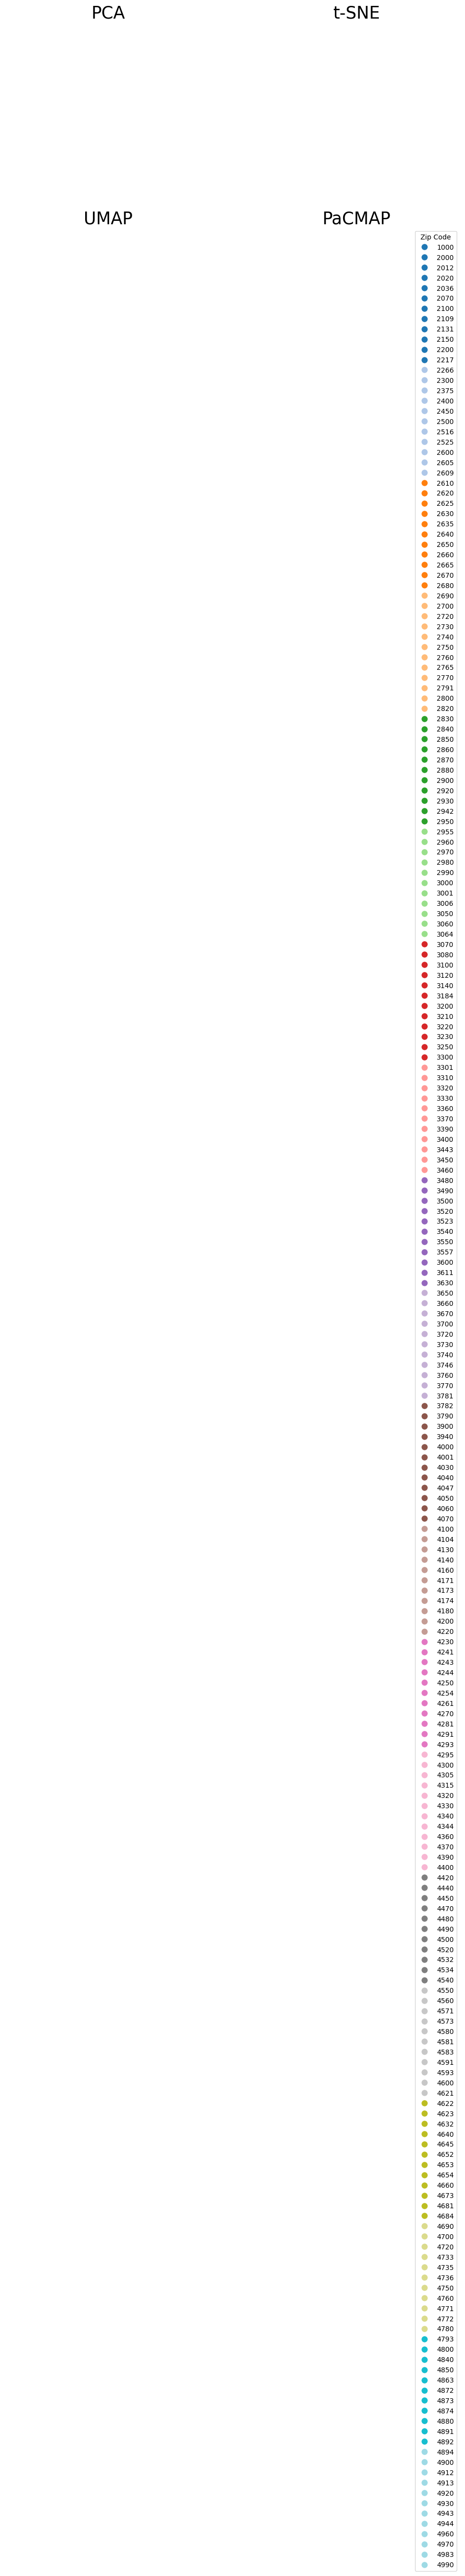

In [20]:
import matplotlib.pyplot as plt

# Define color palette for zip codes
zip_colors = {}  # Dictionary to map zip codes to colors
unique_zip_codes = sorted(zips.keys())
num_colors = len(unique_zip_codes)
color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap
print("number of unique zips: ", num_colors)

for idx, zip_code in enumerate(unique_zip_codes):
    zip_colors[zip_code] = color_palette(idx)

# Create the plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
xs = [proj_2, proj, proj_1, proj_3]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

print(ax)
print()
print(unique_zip_codes)

#should be two times two
for row in ax:
    for col in row:
        print("One plot")
        col.set_title(ts[s], fontsize=25)
        # # Filter journeys by field

        for current_zip_code in unique_zip_codes:
            # Plot all journeys for each zip code
            relevant_addresses = []
            for address, zip_code in address_zips.items():
                if address in distinct_stations_set:
                    if current_zip_code == zip_code:
                        relevant_addresses.append(address)
                        

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            #print(relevant_journeys_zip)
        #     print(journey_idx)

            #for j in relevant_journeys_zip:
               # print([journey_idx[j]])

            print([journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip)
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, edgecolors='white', label=zip_code, c=zip_colors[zip_code]
            )

        s += 1
        col.axis('off')

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=zip_colors[zip_code], label=zip_code) for zip_code in unique_zip_codes]
plt.legend(handles=handles, title='Zip Code')

fig.tight_layout()
plt.show()
